<a href="https://colab.research.google.com/github/CristinaPineda/projeto1-DataAnalysisHSMuCode/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

## Instruções do projeto

Na base de dados de infrações de trânsito, analise o mês de julho de 2020.
Para acessá-la, basta clicar no link em anexo.

### Perguntas que podem ser respondidas durante a análise:
* Qual é o total de infrações por tipo de infração (leve, média, grave, gravíssima)?
* Qual é o total de infrações por dia?
* A base de dados possui valores faltantes?

Suba o código utilizado na análise dos dados na conta do Github e compartilhe o link do projeto no campo ao lado para que outros desenvolvedores possam analisá-lo.

In [ ]:
# importando pandas
import pandas as pd 
import numpy as np

In [ ]:
# importando arquivo para análise
df = pd.read_csv('julho.csv', sep=';')
df.head()

In [ ]:
df.describe()

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
count,77348,77348,77348,77331,77348,77348,77342,13373,13148,3079,12221,12221,77348
unique,137,137,2,39,31,1440,348,130,34,225,10515,10537,4
top,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,03/07/2020,12:40,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",69,Sentido Crescente,km 69,0.0,0.0,Média
freq,44594,44594,74486,40926,2943,132,6274,1928,6580,515,932,932,48184


In [ ]:
# tamanho do df
df.shape

(77348, 13)

In [ ]:
# colunas do df
df.columns

Index(['tipo_infracao', 'descricao', 'tipo_infrator', 'tipo_veiculo',
       'cometimento', 'hora_cometimento', 'auinf_local_rodovia',
       'auinf_local_km', 'auinf_local_referencia', 'auinf_local_complemento',
       'auinf_local_latitude', 'auinf_local_longitude', 'grav_tipo'],
      dtype='object')

In [ ]:
# tipos de dados
df.dtypes

tipo_infracao              object
descricao                  object
tipo_infrator              object
tipo_veiculo               object
cometimento                object
hora_cometimento           object
auinf_local_rodovia        object
auinf_local_km             object
auinf_local_referencia     object
auinf_local_complemento    object
auinf_local_latitude       object
auinf_local_longitude      object
grav_tipo                  object
dtype: object

In [ ]:
# Qual é o total de infrações por tipo de infração (leve, média, grave, gravíssima)?
dfTipoInfracao = df.groupby("grav_tipo")["grav_tipo"].count()
dfTipoInfracao.dtypes
dfTipoInfracao

grav_tipo
Grave          8195
Gravíssima     6254
Leve          14715
Média         48184
Name: grav_tipo, dtype: int64

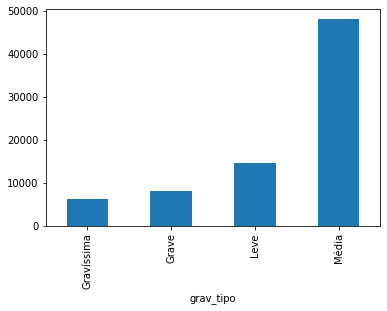

In [ ]:
dfTipoInfracao.sort_values().plot(kind='bar')

In [ ]:
# Total de infracoes por dia
dfInfracaoPorDia = df.groupby("cometimento")["cometimento"].count()
dfInfracaoPorDia

cometimento
01/07/2020    2807
02/07/2020    2849
03/07/2020    2943
04/07/2020    2111
05/07/2020    1812
06/07/2020    2376
07/07/2020    2601
08/07/2020    2588
09/07/2020    2686
10/07/2020    2786
11/07/2020    1975
12/07/2020    1889
13/07/2020    2623
14/07/2020    2587
15/07/2020    2717
16/07/2020    2678
17/07/2020    2846
18/07/2020    2156
19/07/2020    1895
20/07/2020    2543
21/07/2020    2553
22/07/2020    2752
23/07/2020    2540
24/07/2020    2753
25/07/2020    2149
26/07/2020    1818
27/07/2020    2763
28/07/2020    2413
29/07/2020    2737
30/07/2020    2670
31/07/2020    2732
Name: cometimento, dtype: int64

In [ ]:
# Base possui valores faltantes
df.isnull().sum()

tipo_infracao                  0
descricao                      0
tipo_infrator                  0
tipo_veiculo                  17
cometimento                    0
hora_cometimento               0
auinf_local_rodovia            6
auinf_local_km             63975
auinf_local_referencia     64200
auinf_local_complemento    74269
auinf_local_latitude       65127
auinf_local_longitude      65127
grav_tipo                      0
dtype: int64

In [ ]:
# excluir dasos faltantes

df.dropna(subset=["tipo_veiculo"], inplace=True)
df.dropna(subset=["auinf_local_rodovia"], inplace=True)
df.dropna(subset=["auinf_local_km"], inplace=True)
df.dropna(subset=["auinf_local_referencia"], inplace=True)
df.dropna(subset=["auinf_local_complemento"], inplace=True)
df.dropna(subset=["auinf_local_latitude"], inplace=True)
df.dropna(subset=["auinf_local_longitude"], inplace=True)

In [ ]:
df.isnull().sum()

tipo_infracao              0
descricao                  0
tipo_infrator              0
tipo_veiculo               0
cometimento                0
hora_cometimento           0
auinf_local_rodovia        0
auinf_local_km             0
auinf_local_referencia     0
auinf_local_complemento    0
auinf_local_latitude       0
auinf_local_longitude      0
grav_tipo                  0
dtype: int64

# Projeto 2

## Elabore visualizações de dados sobre as infrações de trânsito no mês de julho de 2020. As visualizações podem ser, por exemplo:

* o total de infrações por tipo, com o eixo x representando o tipo e o eixo y o total;
* o total de infrações por tipo de infrator, como condutor e proprietário.

Suba o código criado para resolução da atividade na conta do Github e compartilhe o link do projeto no campo ao lado para que outros desenvolvedores possam analisá-lo.

In [ ]:
# import do matplotlib para fazer os graficos
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total Infracoes')

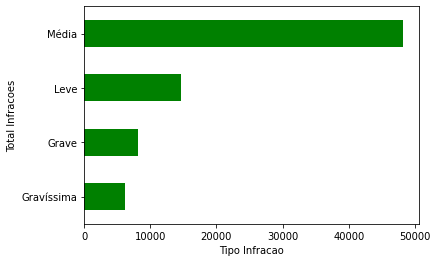

In [ ]:
# o total de infrações por tipo, com o eixo x representando o tipo e o eixo y o total;
dfTipoInfracao.sort_values().plot(kind='barh', color='green')
plt.xlabel("Tipo Infracao")
plt.ylabel("Total Infracoes")

Text(0, 0.5, 'Tipo de Infrator')

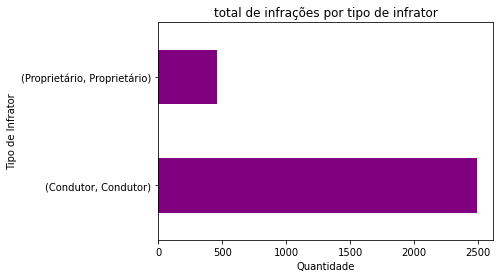

In [ ]:
# o total de infrações por tipo de infrator, como condutor e proprietário.
dfPorTopoInfrator =  df.groupby("tipo_infrator")["tipo_infrator"].value_counts(ascending=False).plot.barh(title = "total de infrações por tipo de infrator", color="purple")
plt.xlabel("Quantidade")
plt.ylabel("Tipo de Infrator")